In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CDFT cuts

In [28]:
dvcsSimInbCDFT = dvcsSimInb.loc[dvcsSimInb.config == 3]
bkgSimInbCDFT = bkgSimInb.loc[bkgSimInb.config == 3]

In [29]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0028130864317399418 136.41274238634784 94
[ 0.52080495  0.01352913  0.13019588  0.73290365  0.26274421 -2.48372299] -0.25386051143771154 0.2809187779604154 0.0028130864317399418
0.8214817824214234 81.31673899461771 94
[ 0.51898777  0.0129644   0.12337844  1.0273045   0.36366213 -4.30811906] -0.24042394555229132 0.26635274808974385 0.8214817824214234
0.8601097971353662 79.34404080251322 94
[ 0.58759827  0.01304389  0.12672435  0.92673086  0.33151353 -2.98847733] -0.24721610598378446 0.27330389323657556 0.8601097971353662
0.6247853983045498 89.05818718350046 94
0.6611880421495658 87.77244800897002 94
0.8463966060184471 80.07741172596764 94
0.708051649774526 86.05409918628428 94
0.6588228677492188 87.85706749218106 94
0.33633431501212685 99.22259383879688 94
0.8932954002284019 77.36005955668938 94
[ 0.57106194  0.01282348  0.12607774  0.94320535  0.34978697 -3.25033073] -0.24610853492772197 0.2717555022658629 0.8932954002284019


In [31]:
len(dvcsSimInbCDFT)

885499

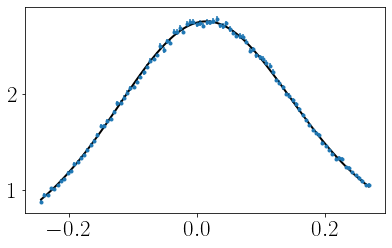

In [32]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [33]:
print(lb_opt, ub_opt)

-0.23933199381540318 0.2649789611535442


In [34]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_ep<0.265)&(dvcsSimInbCDFT.MM2_ep>-0.239)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_ep<0.265)&(bkgSimInbCDFT.MM2_ep>-0.239)]

In [35]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 245252.55677525606 94
0.001901552263262607 138.61816486730885 94
[ 0.51883764  0.90234704  0.1811716  -1.30290729  3.82827478 -1.84392004] 0.5302660727974569 1.2744280061330113 0.001901552263262607
0.570212271636615 90.93930608372011 94
[ 0.62313739  0.89920296  0.18626204 -1.19650947  3.41009953 -1.5526142 ] 0.5166675076557345 1.281738412902056 0.570212271636615
0.35010348326566476 98.69097400593455 94
0.037076235398039836 119.88600969417932 94
0.11933567798834455 110.36161212041804 94
0.14655708865439643 108.43507236107492 94
0.26522098097148206 102.16429101150241 94
0.16865989185378316 107.05578477683102 94
0.3388768889981272 99.12367014083497 94


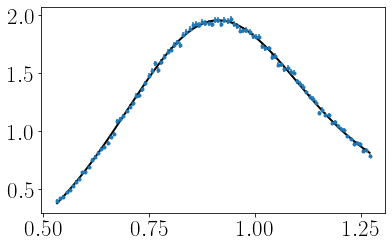

In [36]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [37]:
print(lb_opt, ub_opt)

0.5266788891591438 1.2717270313986468


In [38]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MM2_eg<1.272)&(dvcsSimInbCDFT.MM2_eg>0.527)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MM2_eg<1.272)&(bkgSimInbCDFT.MM2_eg>0.527)]

In [39]:
len(dvcsSimInbCDFT)

405505

In [40]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(-0.2, 0.2, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.21878564753461316 104.33948503797224 94
[ 5.55123371e-01  1.59783044e-02  1.19589647e-01  1.48291129e+00
  1.80260546e+00 -1.76705439e+01] -0.2296288032309919 0.26158541193710205 0.21878564753461316
0.0 339.81166219571975 94
0.0 262890.1184093279 94
0.0 2723.096898944068 94


<ipython-input-20-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 94
0.0 inf 94
0.0 7569.5667386983805 94
0.0 inf 94
0.0 inf 94
0.0 8618.89403319268 94


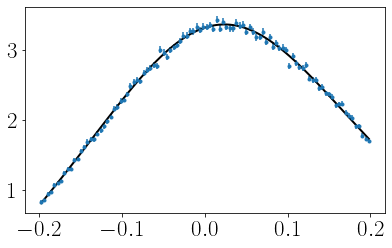

In [41]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [42]:
print(lb_opt, ub_opt)

-0.22320098997313156 0.2551575986792417


In [43]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.ME_epg<0.255)&(dvcsSimInbCDFT.ME_epg>-0.2232)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.ME_epg<0.255)&(bkgSimInbCDFT.ME_epg>-0.2232)]

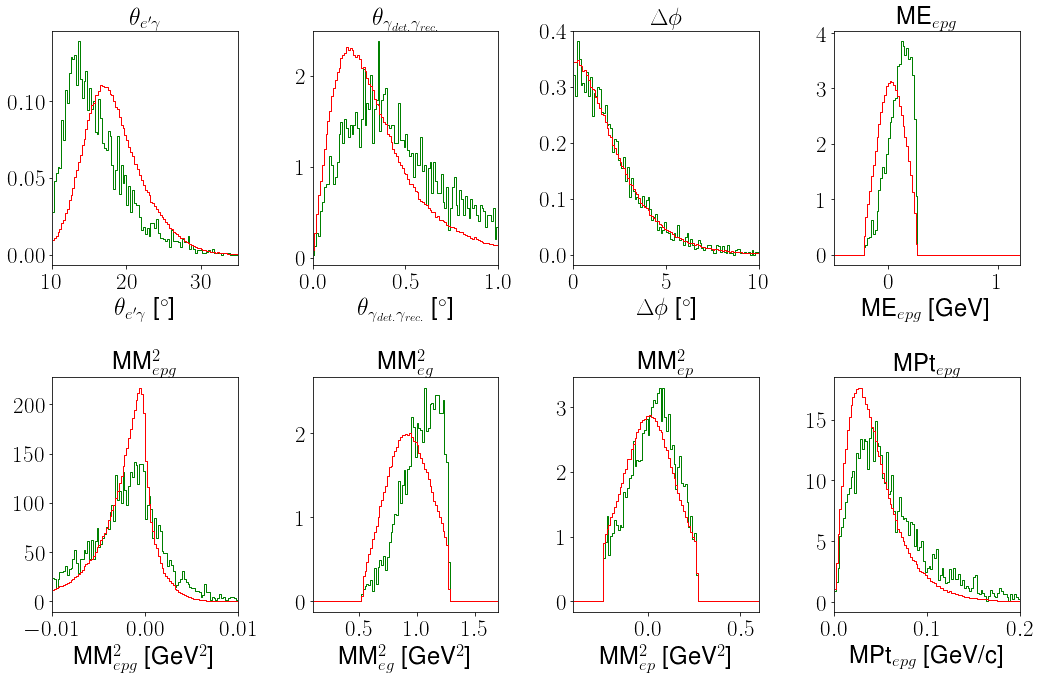

<Figure size 432x288 with 0 Axes>

In [44]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

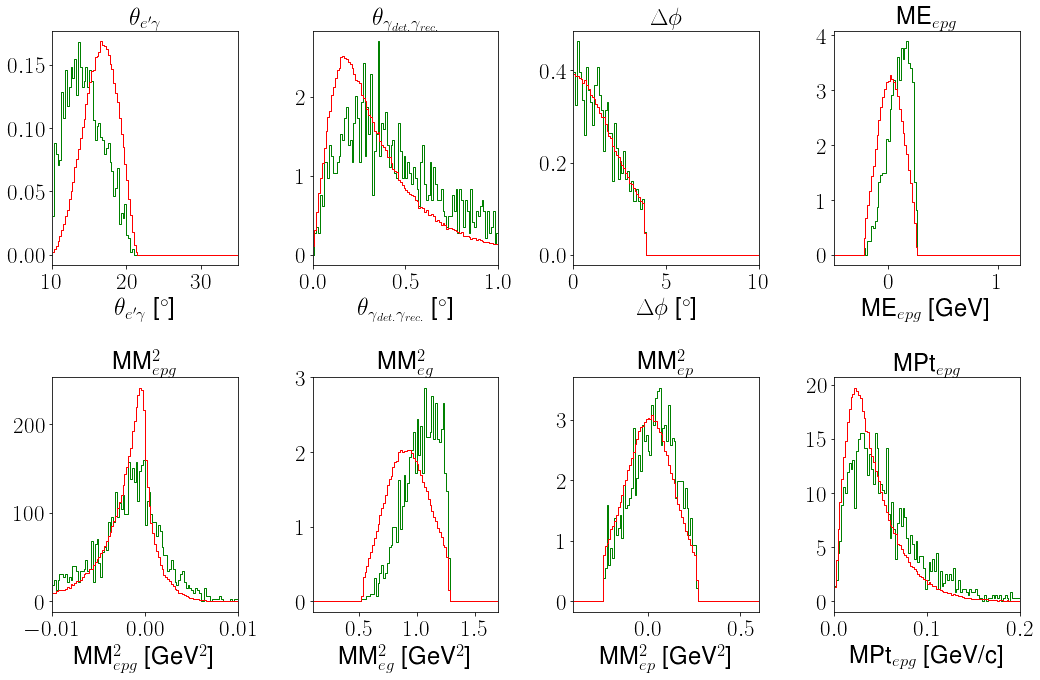

<Figure size 432x288 with 0 Axes>

In [60]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [45]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 0.002)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

1.0360379221197036e-11 218.38143360875506 95
[ 4.85290618e-01  1.92197621e+00  1.52470750e-01 -3.07817023e-02
  1.58730095e-03] 0 9 1.0360379221197036e-11
2.022459977268909e-11 216.0685177681898 95
[ 4.86934405e-01  1.92083122e+00  1.52908228e-01 -3.08104045e-02
  1.58322592e-03] 0 9 2.022459977268909e-11
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95
2.022459977268909e-11 216.0685177681898 95


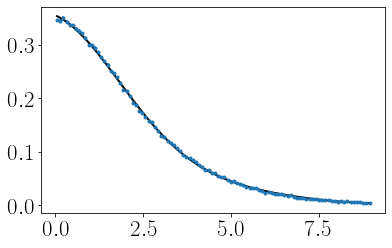

In [49]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [50]:
print(ub_opt)

3.8416624394643213


In [51]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coplanarity<3.842)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coplanarity<3.842)]

In [274]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [52]:
GeEdges = np.linspace(3.5, 8.5, 11)
lbs = []
ubs = []
for j in range(len(GeEdges[:-1])):
    df1 = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.Ge>GeEdges[j])&(dvcsSimInbCDFT.Ge<GeEdges[j+1])]
    df2 = bkgSimInbCDFT.loc[(bkgSimInbCDFT.Ge>GeEdges[j])&(bkgSimInbCDFT.Ge<GeEdges[j+1])]
    pvalue_opt = 0
    for i in range(0, 1):
        if i == 0:
            print(len(df1))
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = 21)
            bins = np.linspace(bins[np.argmax(simDist_dvcs)] -2.5, bins[np.argmax(simDist_dvcs)] + 4, 21)
            simDist_dvcs, _ = np.histogram(df1.coneAngle, bins = bins)
            simDist_dvpi0, _ = np.histogram(df2.coneAngle, bins = bins)
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
            params = [1, bins[np.argmax(simDist)], 2.5, 0, 0, 0]
        else:
            simDist_dvcs, bins = np.histogram(df1.coneAngle, bins = np.linspace(lb, ub, 101))
            simDist_dvpi0, bins = np.histogram(df2.coneAngle, bins = np.linspace(lb, ub, 101))
            bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
            simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
            uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
        params = res_lsq.x
        Amp, loc, scale, a, b, c = params
        lb = norm.ppf(0.02, loc = loc, scale = scale)
        ub = norm.ppf(0.98, loc = loc, scale = scale)
        pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
        print(pvalue, chi2fit, dof)
        if pvalue>pvalue_opt:
            pvalue_opt = pvalue
            bins_opt = bins
            bincenters_opt = bincenters
            params_opt = res_lsq.x
            lb_opt = loc - 2*scale
            ub_opt = loc + 2*scale
            lbs.append(lb_opt)
            ubs.append(ub_opt)
            dist_opt = simDist
            unc_opt = uncDist
            print(params_opt, lb, ub, pvalue)

2145
0.3600618102983102 15.268325353766485 14
[ 6.19605764e-01  1.18524108e+01  1.02432625e+00 -1.13811846e-01
  4.20586052e-02 -2.23443862e-03] 9.748701860849739 13.95611968759863 0.3600618102983102
4738
0.7171788670919144 10.59941334330558 14
[ 6.05751320e-01  1.24259191e+01  1.11711147e+00 -5.96488021e-01
  1.12275858e-01 -4.65365211e-03] 10.13165265834156 14.72018560226297 0.7171788670919144
8478
0.3799022752918717 14.974467840377702 14
[ 4.79006768e-01  1.29831777e+01  1.11865539e+00 -1.14840111e+00
  1.91265692e-01 -7.28538809e-03] 10.68574046266836 15.280615023455733 0.3799022752918717
13702
0.9698210781617482 5.863259135199918 14
[ 5.39407906e-01  1.36397211e+01  1.26594023e+00 -9.17062601e-01
  1.45010424e-01 -5.21863036e-03] 11.039797716885747 16.239644455051256 0.9698210781617482
20396
0.669031503590603 11.21547957181924 14
[ 7.03143991e-01  1.42436309e+01  1.50627963e+00 -6.89911619e-01
  9.88488581e-02 -3.24408093e-03] 11.150110753598643 17.337151055252896 0.66903150359060

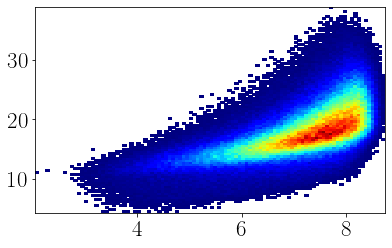

In [53]:
plt.hist2d(dvcsSimInbCDFT.Ge, dvcsSimInbCDFT.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

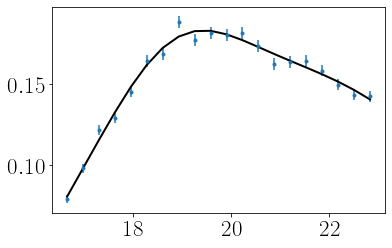

In [54]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [55]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[0.01341965 1.39852822 8.46896061]
[ 0.25846154 -1.63189686 12.40796764]


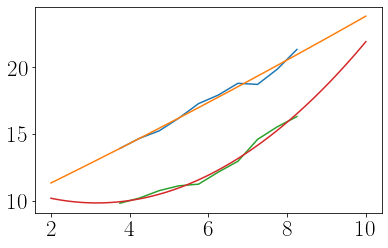

In [57]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.0134, 1.399, 8.469])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)

plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.258, -1.632, 12.408])(np.linspace(2, 10, 101)))
# plt.plot(np.linspace(2, 10, 101), np.poly1d(res_lsq.x)(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [58]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.coneAngle<np.poly1d([0.0134, 1.399, 8.469])(dvcsSimInbCDFT.Gp))&(dvcsSimInbCDFT.coneAngle>np.poly1d([0.258, -1.632, 12.408])(dvcsSimInbCDFT.Gp))]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.coneAngle<np.poly1d([0.0134, 1.399, 8.469])(bkgSimInbCDFT.Gp))&(bkgSimInbCDFT.coneAngle>np.poly1d([0.258, -1.632, 12.408])(bkgSimInbCDFT.Gp))]


In [59]:
len(dvcsSimInbCDFT)

202590

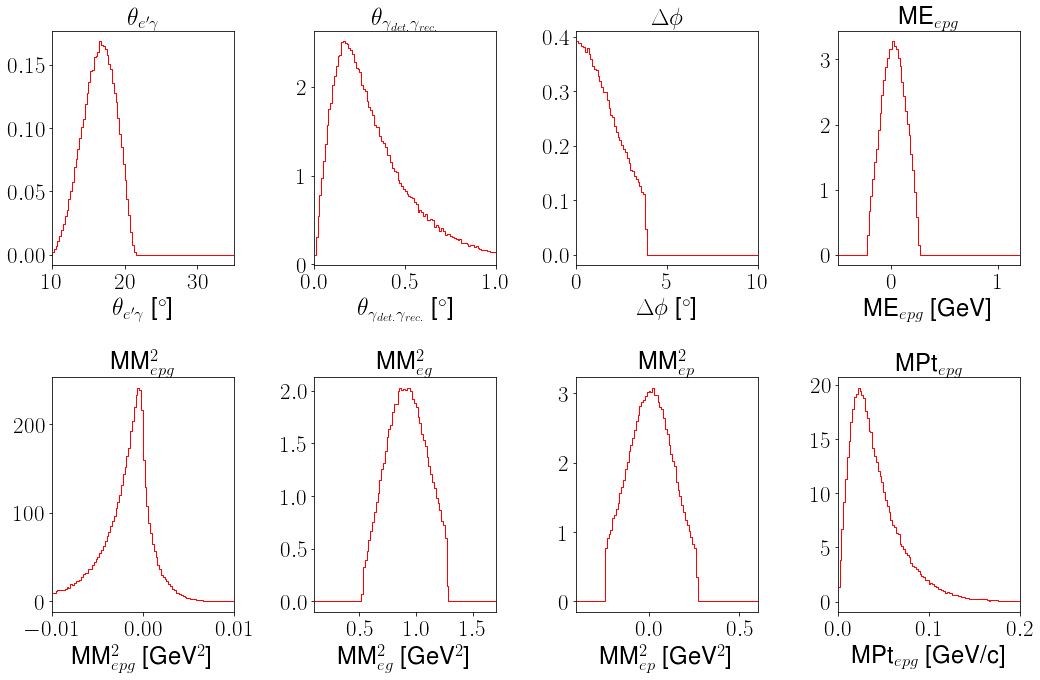

<Figure size 432x288 with 0 Axes>

In [61]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [67]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(0.005, 0.05, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.04)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.8416969933827967 8.831400518340454 14
[ 5.99191414e-01  1.94543978e-02  1.31637828e-02 -4.03159185e+00
  8.92315124e+02 -1.04455497e+04] 0.005 0.03632446420255997 0.8416969933827967
0.08809950161925362 113.04115836418826 94
0.440137084492644 95.4059901502277 94
0.45247968320529486 94.97402651786616 94
0.7549290846267958 84.22601490034248 94
0.692072213874246 86.64995533434823 94
0.4080681636277528 96.54521473426054 94
0.5931129084480049 90.1545887858378 94
0.5931128990035587 90.15458911057775 94
0.5931128990035587 90.15458911057775 94


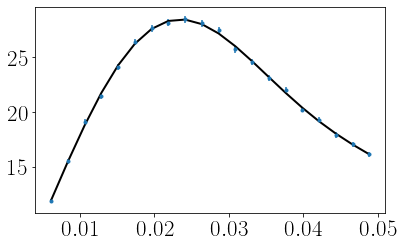

In [68]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [69]:
params_opt

array([ 5.99191414e-01,  1.94543978e-02,  1.31637828e-02, -4.03159185e+00,
        8.92315124e+02, -1.04455497e+04])

In [70]:
print(ub_opt)

0.0457819633235692


In [71]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[(dvcsSimInbCDFT.MPt<0.0458)]
bkgSimInbCDFT = bkgSimInbCDFT.loc[(bkgSimInbCDFT.MPt<0.0458)]

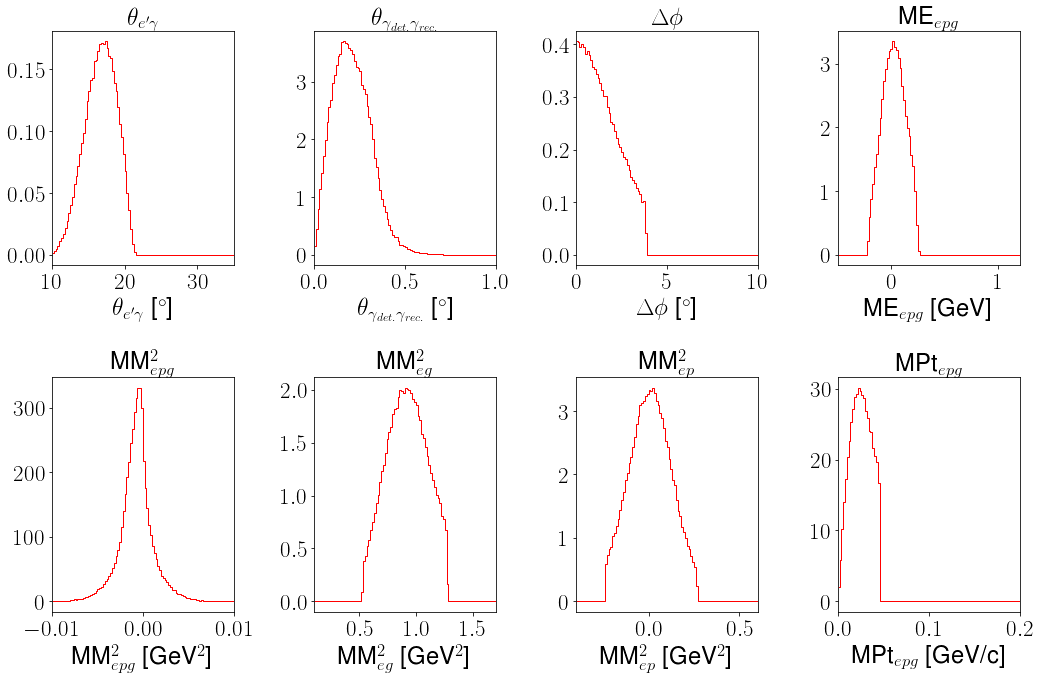

<Figure size 432x288 with 0 Axes>

In [72]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [87]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(0.005, 0.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbCDFT)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbCDFT*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbCDFT)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbCDFT**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = min(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 261.0081083721473 94
[  7.94986337   0.14372819   0.21537146 -11.85404852  -0.42631357
  34.22273256] 0.005 0.41973781950696876 0.0


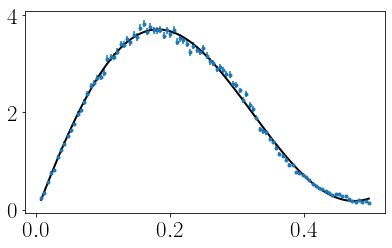

In [88]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [89]:
print(ub_opt)

0.5744711090147173


In [246]:
dvcsSimInbCDFT = dvcsSimInbCDFT.loc[dvcsSimInbCDFT.reconGam<0.574]
bkgSimInbCDFT = bkgSimInbCDFT.loc[bkgSimInbCDFT.reconGam<0.574]

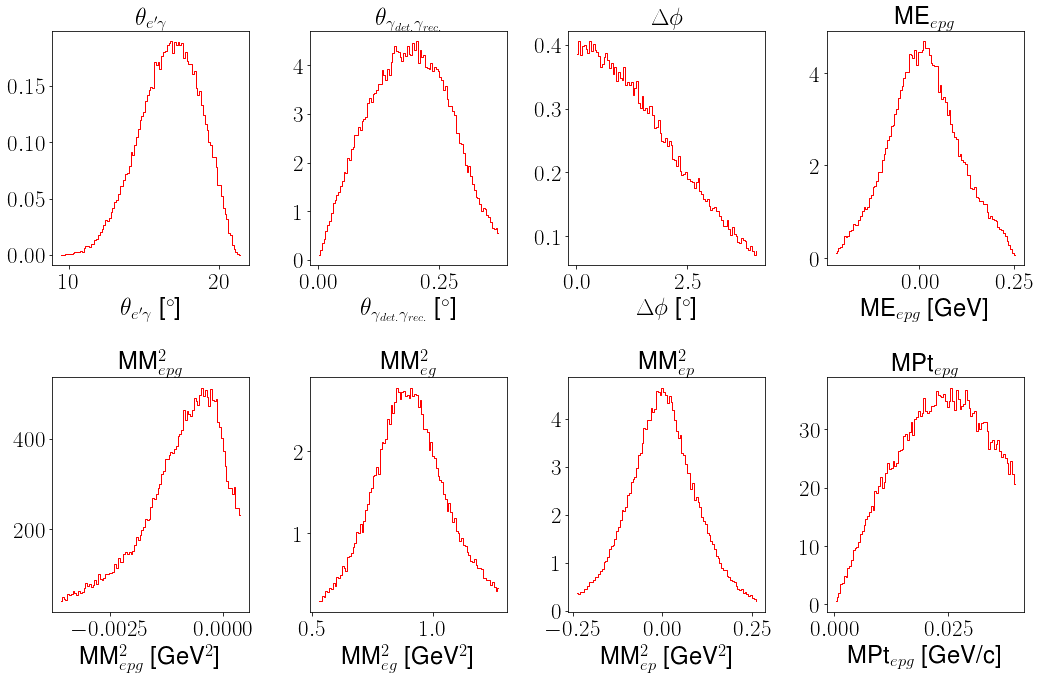

<Figure size 432x288 with 0 Axes>

In [247]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [1]:
print(dvcsSimInbCDFT.MM2_epg.mean()-2*dvcsSimInbCDFT.MM2_epg.std(), dvcsSimInbCDFT.MM2_epg.mean()-2*dvcsSimInbCDFT.MM2_epg.std())

NameError: name 'dvcsSimInbCDFT' is not defined